In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import (
    DecisionTreeRegressor,
    plot_tree
)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Jak kosztowne jest zdrowie? 
Dane: https://www.kaggle.com/datasets/mirichoi0218/insurance
Cel: określenie kosztów zdrowia na podstawie parametrów ubezpieczonego
Stakeholder: właściciel prywatnej placówki zdrowotnej, który rozważa zmiany wysokości ubezpieczeń

## **Import pliku**

Opis kolumn:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
df = pd.read_csv('insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


analiza wstępna

In [5]:
df.shape

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
df.sample(20)

,age,sex,bmi,children,smoker,region,charges
1223,20,female,24.420,0,yes,southeast,26125.67477
62,64,male,24.700,1,no,northwest,30166.61817
1139,19,female,32.490,0,yes,northwest,36898.73308
1228,56,male,34.430,0,no,southeast,10594.22570
1192,58,female,32.395,1,no,northeast,13019.16105
400,51,female,20.600,0,no,southwest,9264.79700
522,51,female,33.915,0,no,northeast,9866.30485
1253,40,female,29.300,4,no,southwest,15828.82173
63,28,female,25.935,1,no,northwest,4133.64165
158,30,male,35.530,0,yes,southeast,36950.25670


In [9]:
# sprawdzenie czy są wartości puste
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:

df_oryg = df.copy()

In [12]:
# zamiana na wartości numeryczne 
df['sex'] = df['sex'].map({'female' : 1, 'male' : 0})
df['smoker'] = df['smoker'].map({'yes' : 1, 'no' : 0})
# zamiana na wartości T/F 
df = pd.get_dummies(df,['region'])

In [13]:
df.sample(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
376,39,1,24.890,3,1,21659.93010,True,False,False,False
148,53,1,37.430,1,0,10959.69470,False,True,False,False
486,54,1,21.470,3,0,12475.35130,False,True,False,False
508,24,1,25.270,0,0,3044.21330,True,False,False,False
780,30,0,24.400,3,1,18259.21600,False,False,False,True
248,19,0,20.900,1,0,1832.09400,False,False,False,True
236,18,1,26.730,0,0,1615.76670,False,False,True,False
706,51,1,38.060,0,1,44400.40640,False,False,True,False
671,29,1,31.160,0,0,3943.59540,True,False,False,False
1042,20,0,30.685,0,1,33475.81715,True,False,False,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.1 KB


In [15]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [16]:
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [17]:
df.nunique()

age                   47
sex                    2
bmi                  548
children               6
smoker                 2
charges             1337
region_northeast       2
region_northwest       2
region_southeast       2
region_southwest       2
dtype: int64

In [18]:
# sprawdzenie częstości występowania określonej liczbyt dzieci 
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [19]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

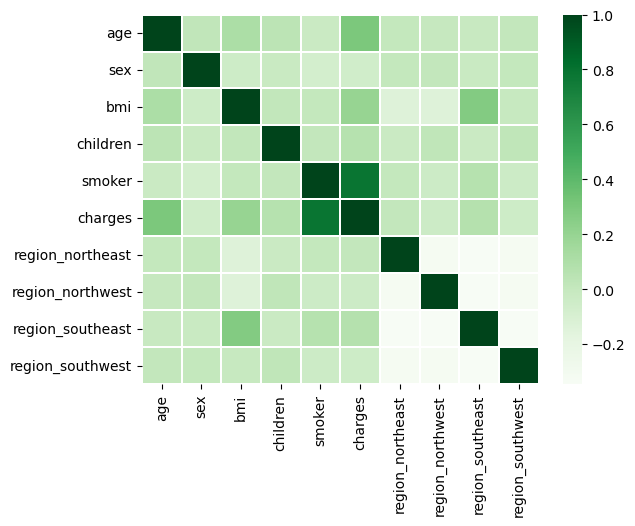

In [20]:
sns.heatmap(df.corr(), cmap="Greens", linecolor="white", linewidths=0.01, )

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

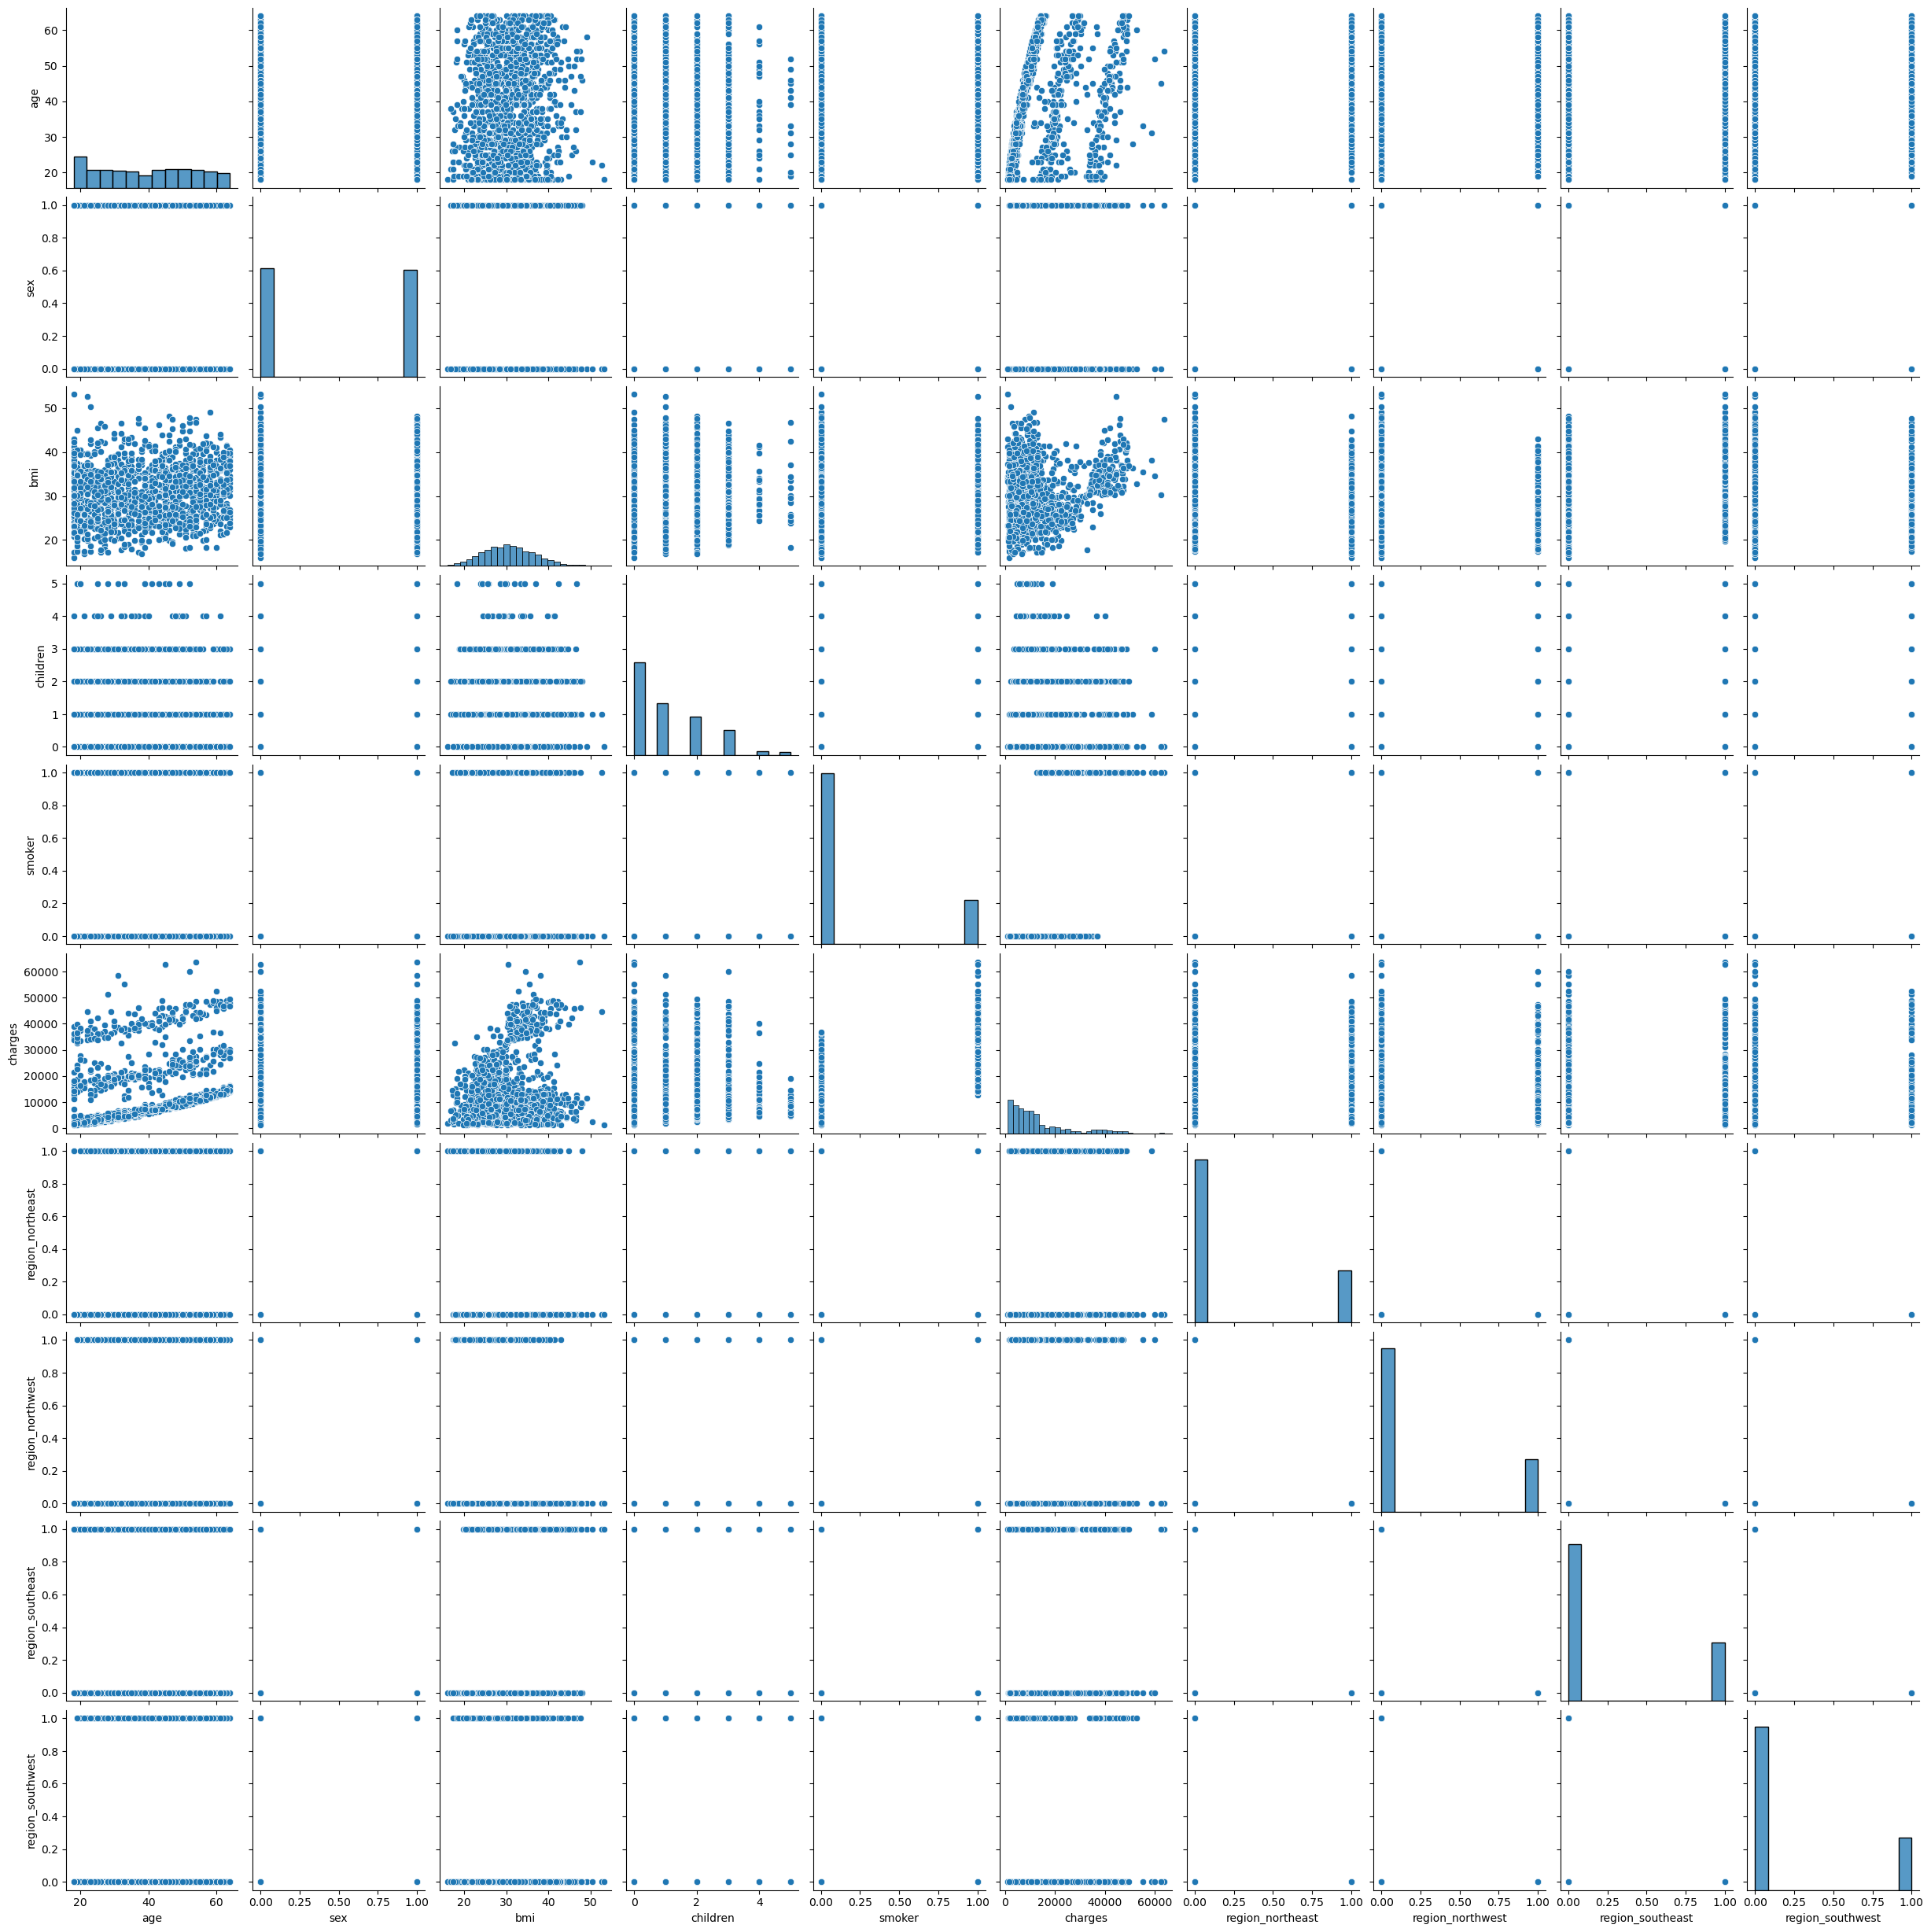

In [21]:
sns.pairplot(df)

porównanie palącyh oraz niepalących

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Agata\anaconda3\envs\new_virtual_env

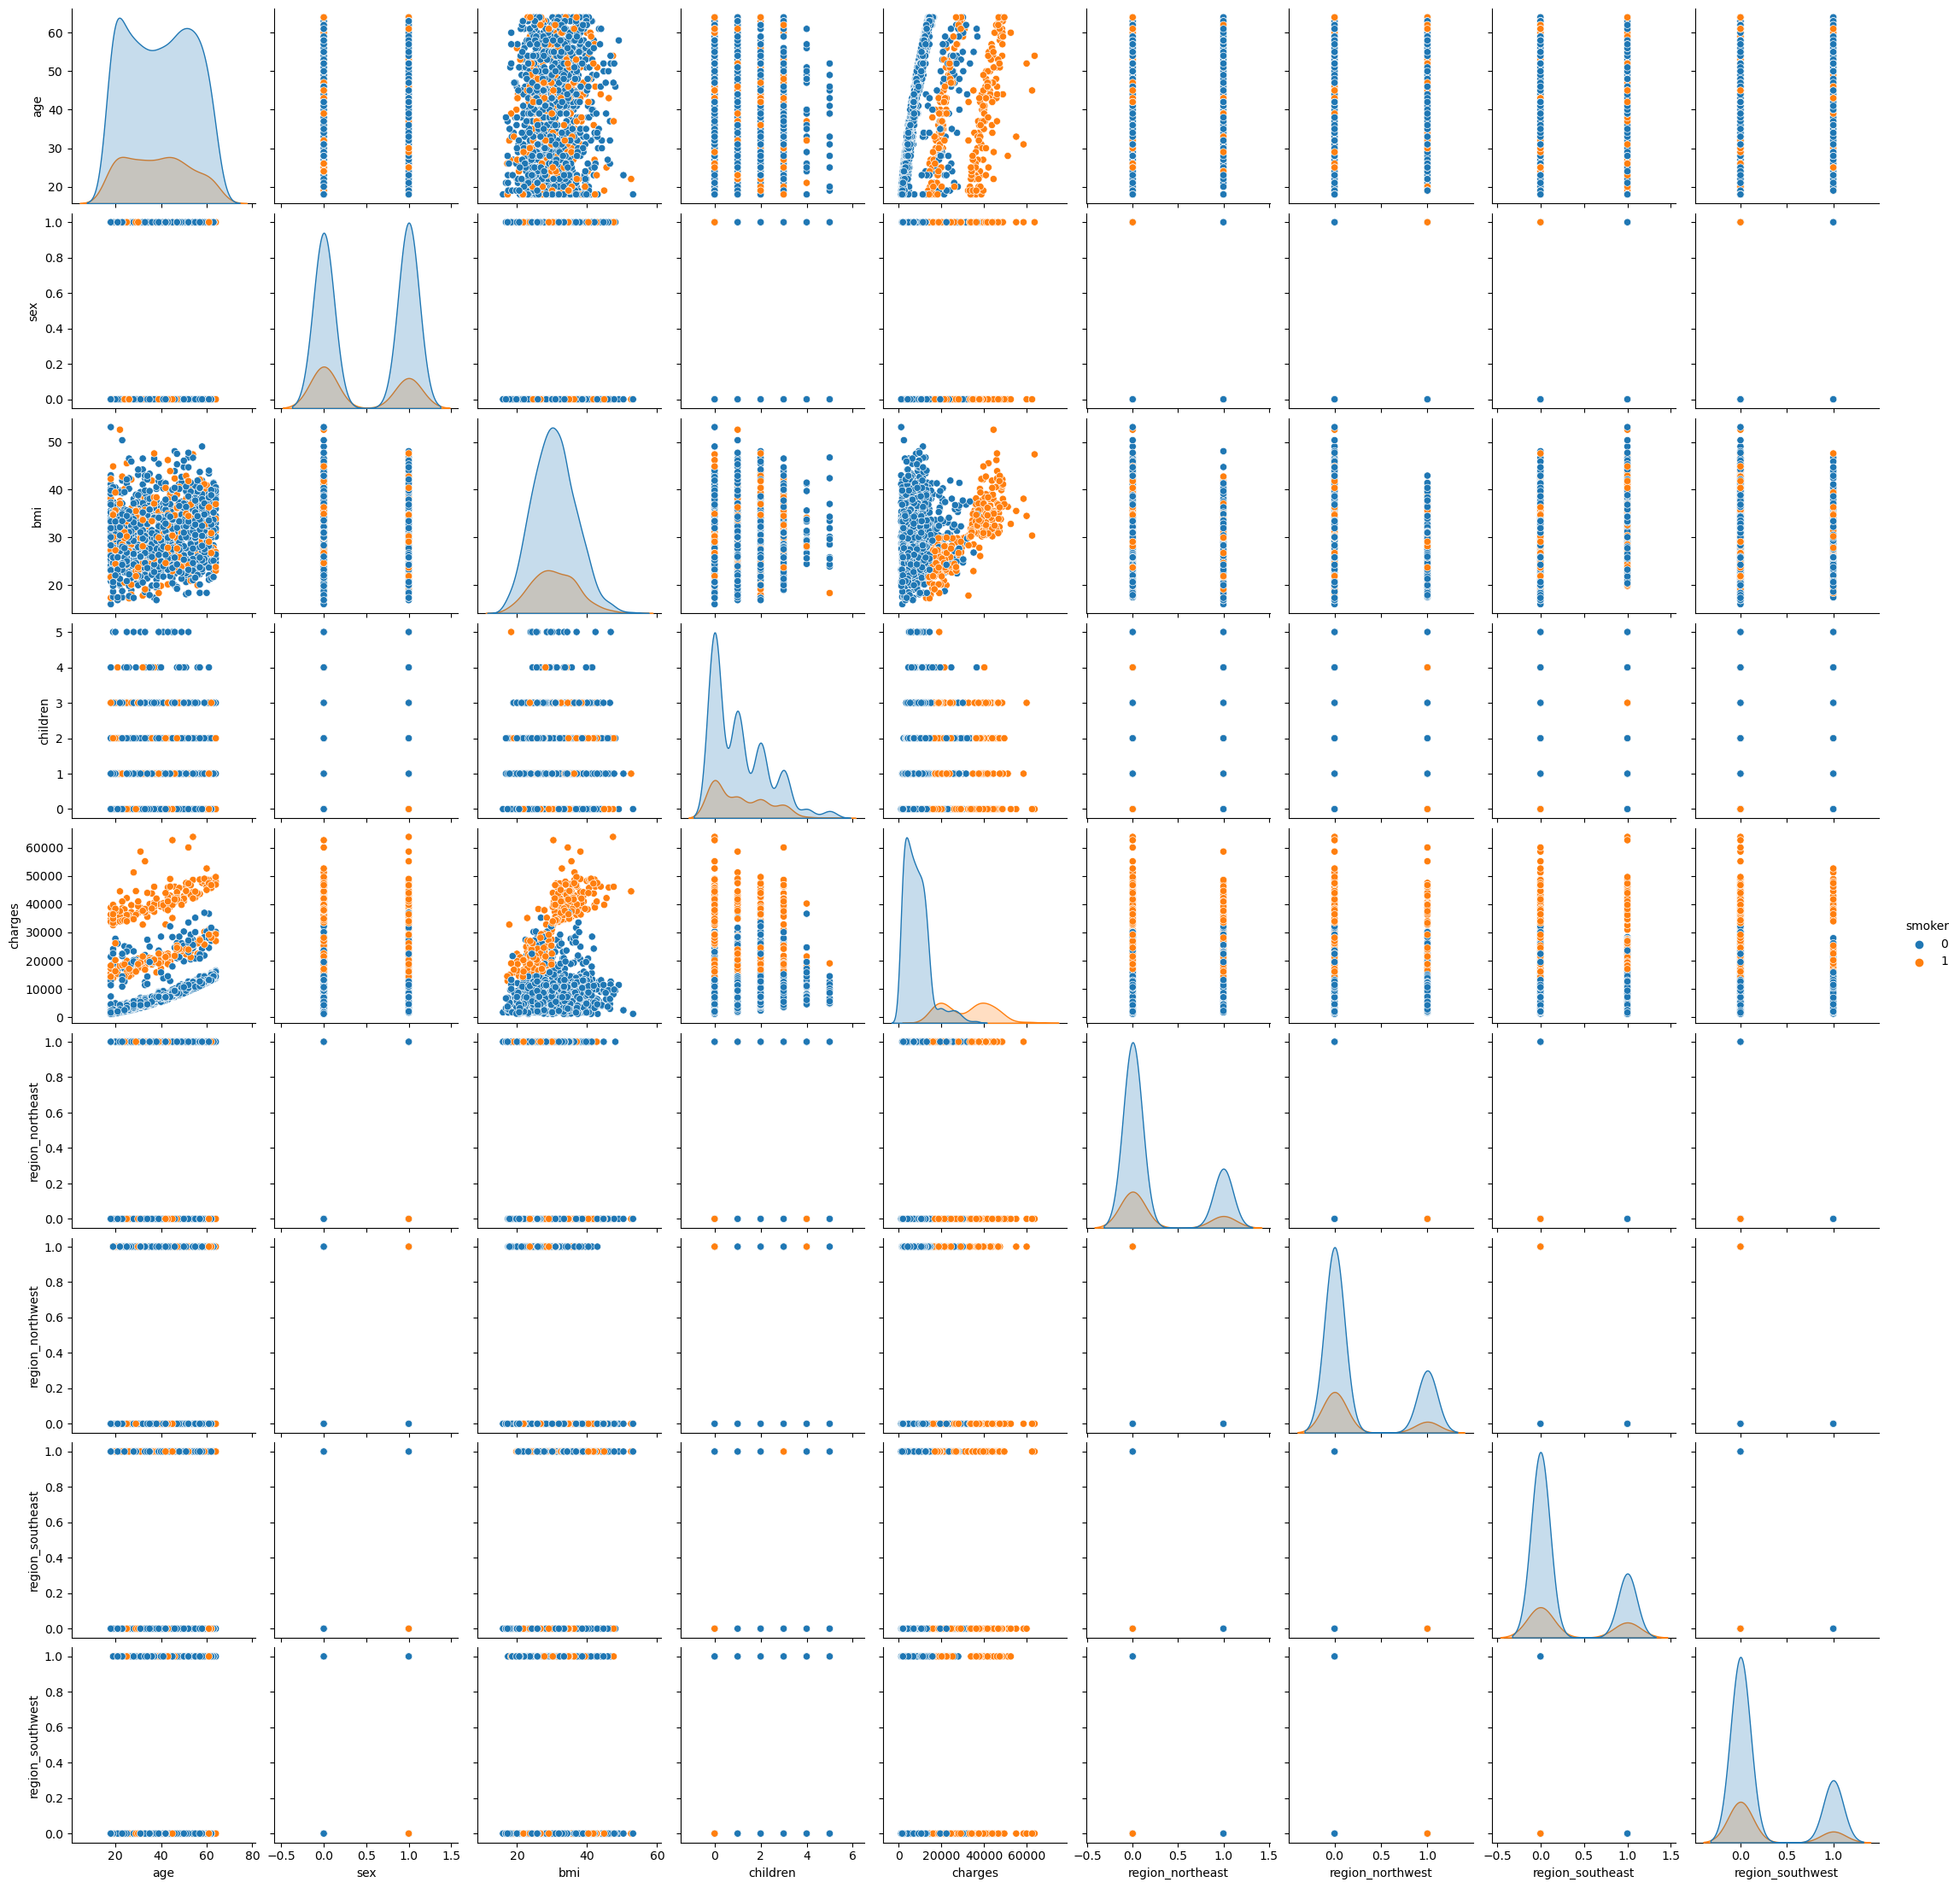

In [22]:
sns.pairplot(df, hue= 'smoker')


In [23]:
df_oryg.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Histogramy dla wartości z tabeli

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


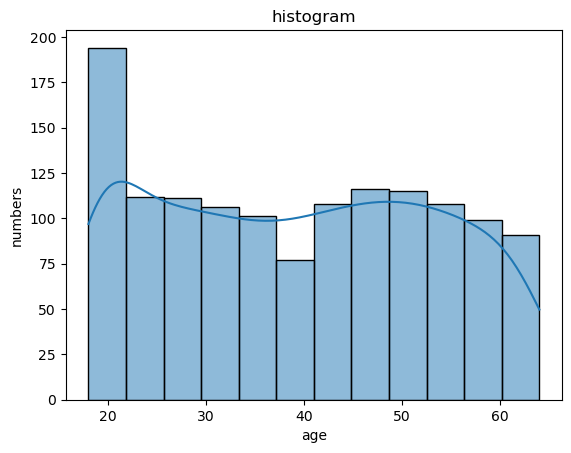

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


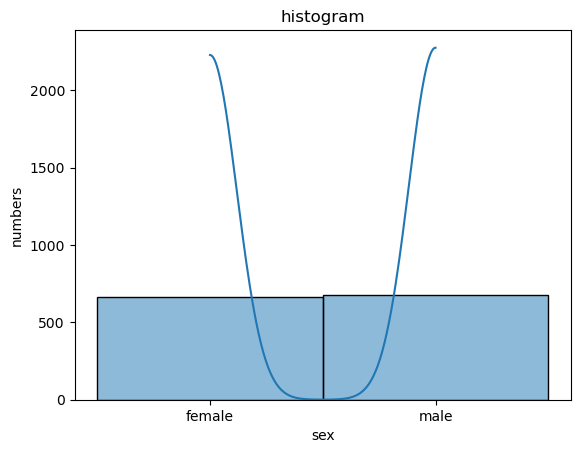

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


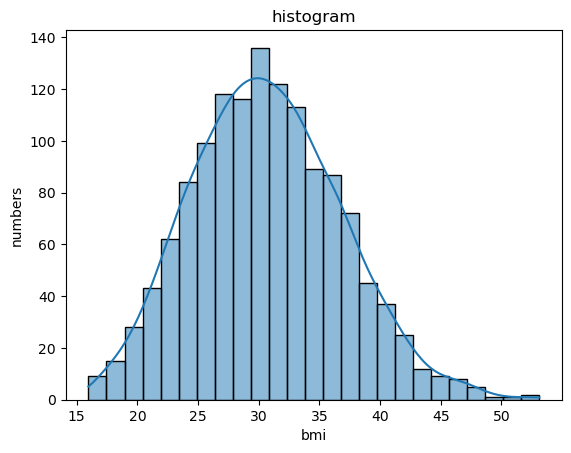

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


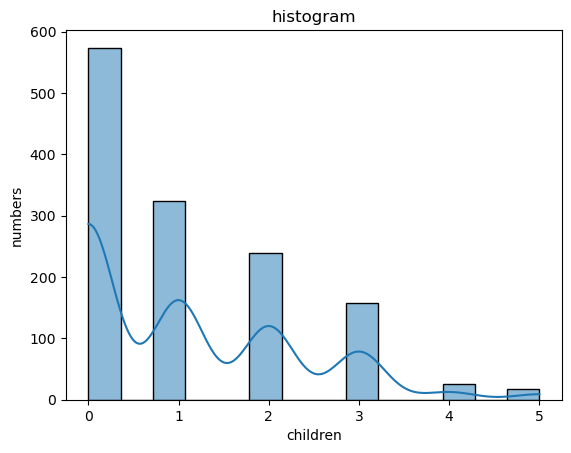

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


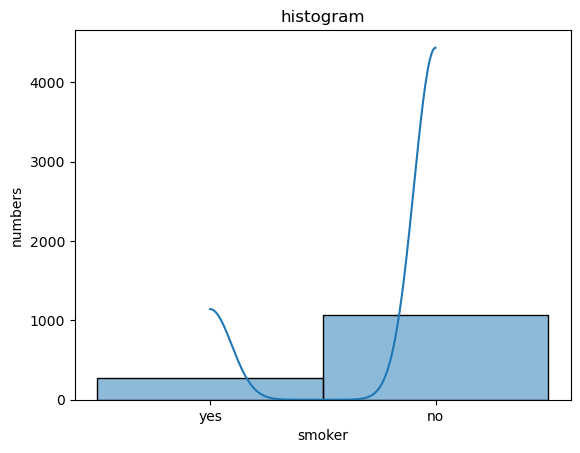

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


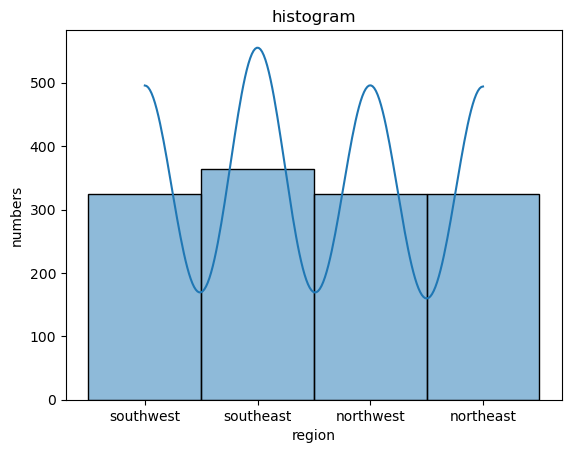

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


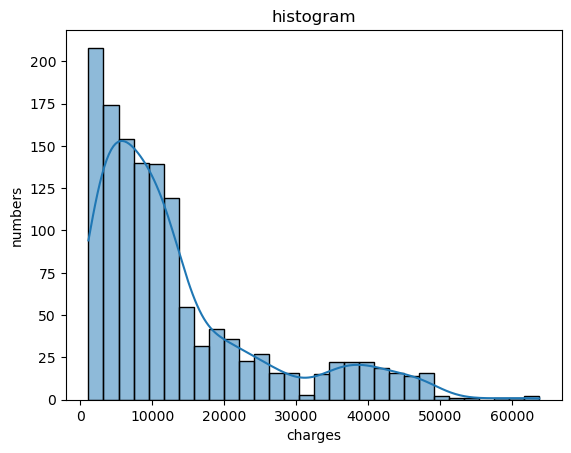

In [24]:
columns = df_oryg.columns
for column in columns:
    sns.histplot(df_oryg[column],bins='auto', kde=True)
    plt.ylabel("numbers")
    plt.title("histogram")
    plt.show()

In [25]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [26]:
df_cut = df_oryg.copy()


In [27]:
# stworzenie nowego df z pogrupowanymi danymi
df_cut['age'] = pd.cut(df_cut['age'], bins=[0,20,30,40,50,60,70],labels=['18-20','21-29', '31-40', '41-50', '51-60', '61-64'])
df_cut['bmi'] = pd.cut(df_cut['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 55], labels=['Niedowaga', 'Waga w normie', 'Nadwaga', 'Otyłość I stopnia', 'Otyłość II stopnia','Otyłość III stopnia'])
df_cut['charges'] = pd.cut(df_cut['charges'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000,60000,65000, float('inf')],
                            labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000','35000-40000','40000-45000','45000-50000','50000-55000','55000-60000','60000-65000','65000-70000',])

In [28]:
df_cut

,age,sex,bmi,children,smoker,region,charges
0,18-20,female,Nadwaga,0,yes,southwest,15000-20000
1,18-20,male,Otyłość I stopnia,1,no,southeast,0-5000
2,21-29,male,Otyłość I stopnia,3,no,southeast,0-5000
3,31-40,male,Waga w normie,0,no,northwest,20000-25000
4,31-40,male,Nadwaga,0,no,northwest,0-5000
...,...,...,...,...,...,...,...
1333,41-50,male,Otyłość I stopnia,3,no,northwest,10000-15000
1334,18-20,female,Otyłość I stopnia,0,no,northeast,0-5000
1335,18-20,female,Otyłość II stopnia,0,no,southeast,0-5000
1336,21-29,female,Nadwaga,0,no,southwest,0-5000


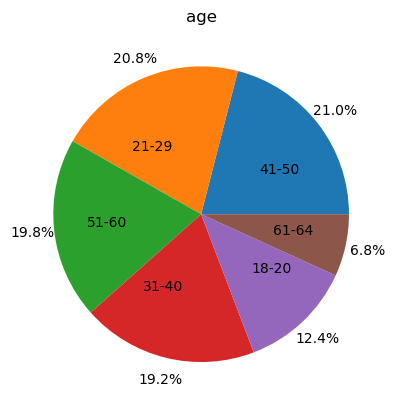

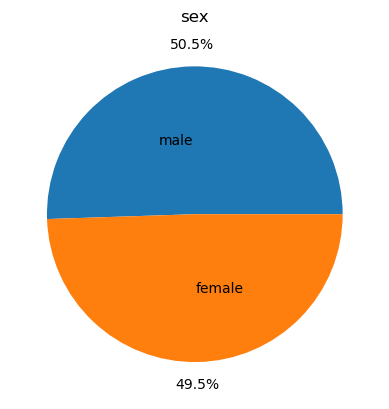

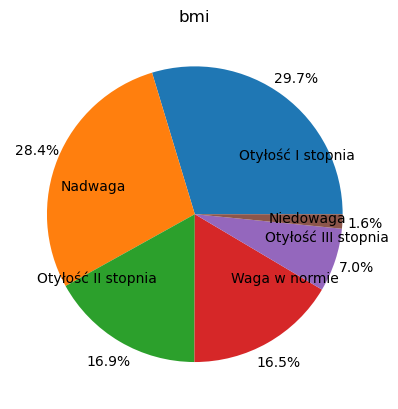

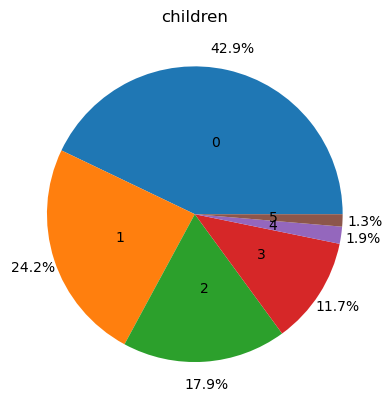

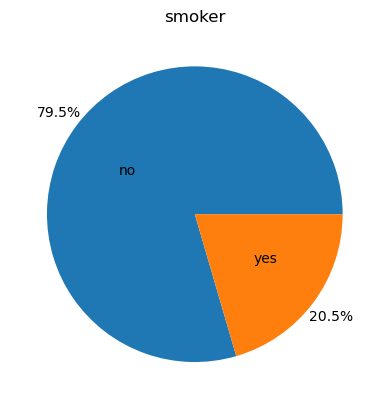

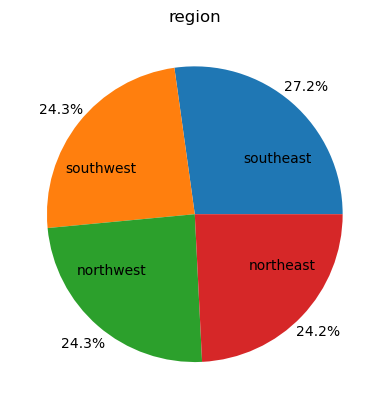

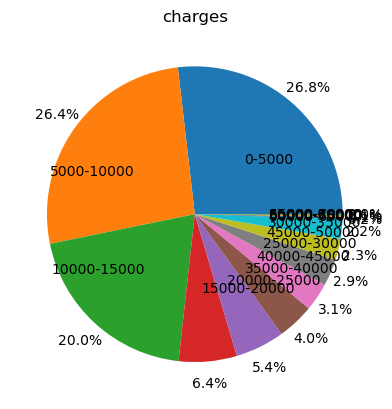

In [29]:
# wykresy kołowe dla pogrupowanych danych 
columns = df_oryg.columns
for column in columns:
    plt.pie(df_cut[column].value_counts(), labels = df_cut[column].value_counts().index, 
            autopct='%1.1f%%',
            pctdistance=1.15,
            labeldistance=.5)
    plt.title(column)
    plt.show()

Sprawdzanie wartości odstających

<Axes: >

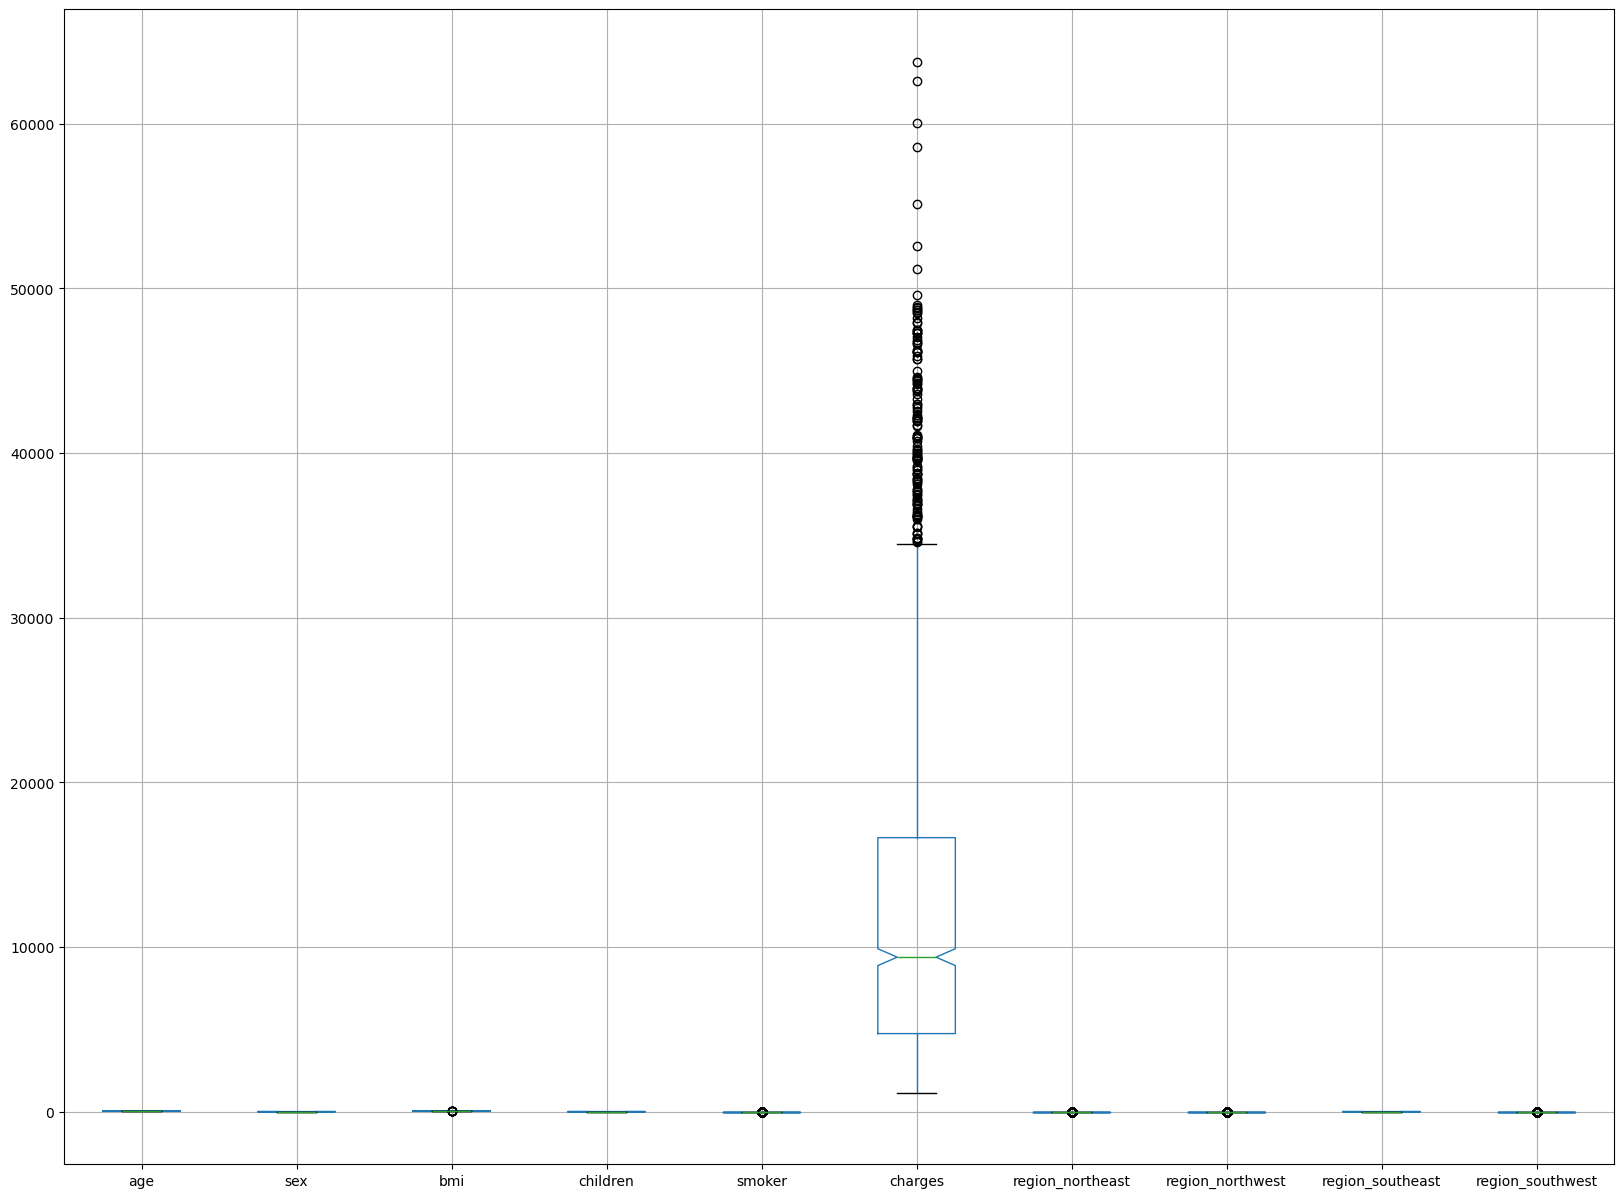

In [30]:
df.boxplot(figsize =(20,15), notch=True)

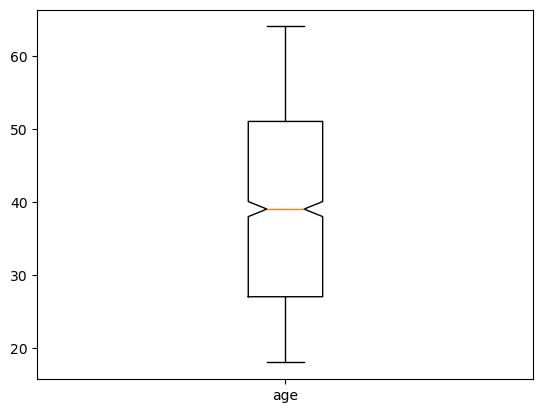

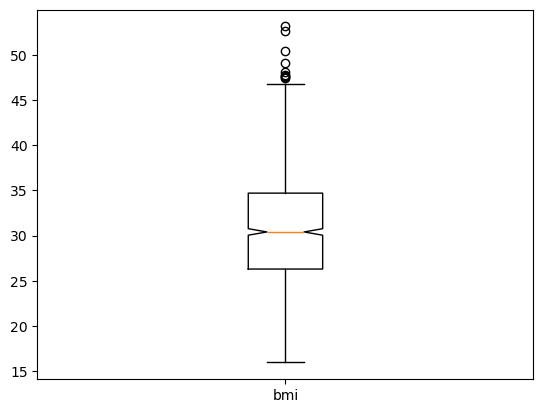

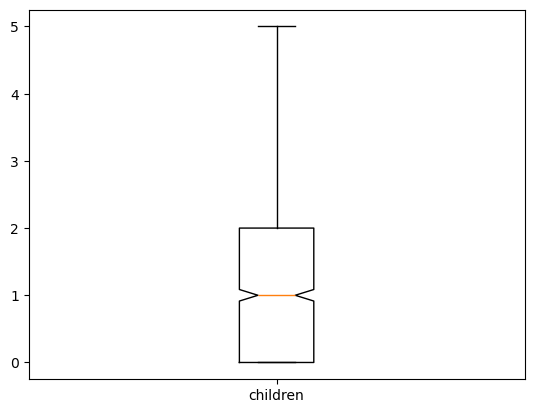

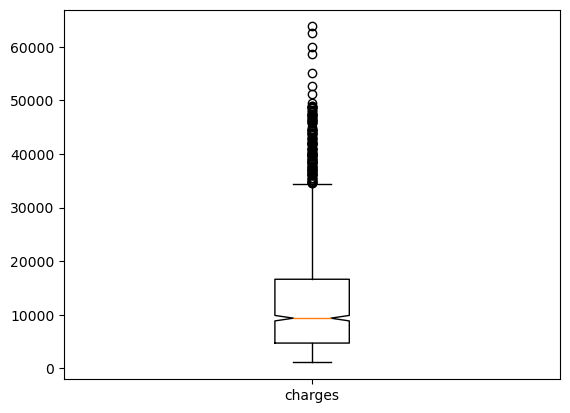

In [31]:
columns = ['age', 'bmi', 'children', 'charges'
       ]
for column in columns:
    plt.boxplot(df[column],labels=[column], notch=True)
    plt.show()

In [32]:
df.sort_values('charges', ascending=False)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
543,54,1,47.410,0,1,63770.42801,False,False,True,False
1300,45,0,30.360,0,1,62592.87309,False,False,True,False
1230,52,0,34.485,3,1,60021.39897,False,True,False,False
577,31,1,38.095,1,1,58571.07448,True,False,False,False
819,33,1,35.530,0,1,55135.40209,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
22,18,0,34.100,0,0,1137.01100,False,False,True,False
663,18,0,33.660,0,0,1136.39940,False,False,True,False
1244,18,0,33.330,0,0,1135.94070,False,False,True,False
808,18,0,30.140,0,0,1131.50660,False,False,True,False


In [33]:
'''
#USUNIĘCIE WARTOŚCI ODSTAJĄCYCH - POGARSZA SKUTECZNOŚĆ MODELI

1. usunięcie wartości skrajnie odstających 

q25 = df['charges'].quantile(0.25)
q75 = df['charges'].quantile(0.75)
IQR = q75-q25
                                                              
upper_boundary = (q75 + 3*IQR)
lower_boundary = (q25 - 3*IQR)

df = df.loc[(df['charges']<upper_boundary) & (df['charges']>lower_boundary)]
df

'''

'''
2. usunięcie wartości odstających 

q25 = df['charges'].quantile(0.25)
q75 = df['charges'].quantile(0.75)
IQR = q75-q25
                                                              
upper_boundary = (q75 + 1.5*IQR)
lower_boundary = (q25 - 1.5*IQR)

df = df.loc[(df['charges']<upper_boundary) & (df['charges']>lower_boundary)]
df'''

"\n2. usunięcie wartości odstających \n\nq25 = df['charges'].quantile(0.25)\nq75 = df['charges'].quantile(0.75)\nIQR = q75-q25\n                                                              \nupper_boundary = (q75 + 1.5*IQR)\nlower_boundary = (q25 - 1.5*IQR)\n\ndf = df.loc[(df['charges']<upper_boundary) & (df['charges']>lower_boundary)]\ndf"

In [34]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [35]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,False,True,False,False
1334,18,1,31.920,0,0,2205.98080,True,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,False,True


podział na zmienne objaśniające (x) oraz zmienną objaśnianą (y)

In [36]:
X = df.drop(columns = ['charges'])
Y = df['charges']

In [37]:
# celem uzyskania etykiet na wykresach 
X.rename(columns={'age':'age',
                    'bmi':'bmi',
                    'children': 'children',
                    'region': 'region',
                    'sex': "sex",
                    'smoker':'smoker',
                    'charges':'charges',
                    'northeast':'northeast',
                    'northwest':'northwest',
                    'southeast':'southeast',
                    'southwest': 'southwest'
                    }, inplace=True)

podział na zbiór treningowy oraz testowy

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


normalizacja danych 

In [40]:
# Normalizujemy dane przy użyciu MinMaxScaler() 
#skalowanie danych 
scaler = StandardScaler()
# Przekazujemy do Scalera nasze dane i scaler analizuje wszystkie wartości - trenowanie obiektu
scaler.fit(train_x)

# Przekształcenie danych.
train_x = pd.DataFrame(scaler.transform(train_x))
test_x = pd.DataFrame(scaler.transform(test_x))



# Regresja liniowa

Modelowanie regresji liniowej w sklearn

In [73]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

predykcja

In [74]:
y_pred = model.predict(test_x)
y_pred_train = model.predict(train_x)

In [75]:
R2_regresja = round(r2_score(test_y, y_pred),3)

sprawdzenie ważności predyktorów

In [76]:
print('intercept: ', model.intercept_)
print('coefficients: ', model.coef_)
print('parameters', X.columns )


intercept:  13344.985819341997
coefficients:  [ 3.63079638e+03 -5.08783707e-01  2.09931364e+03  4.88581999e+02
  9.58437186e+03  1.13762334e+17  1.12154648e+17  1.15948644e+17
  1.13332528e+17]
parameters Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [77]:
importance = pd.DataFrame((model.coef_.reshape(1,-1)), columns= X.columns,index= [type(model).__name__]).transpose()
importance

,LinearRegression
age,3.630796e+03
sex,-5.087837e-01
bmi,2.099314e+03
children,4.885820e+02
smoker,9.584372e+03
region_northeast,1.137623e+17
region_northwest,1.121546e+17
region_southeast,1.159486e+17
region_southwest,1.133325e+17


In [78]:
model.coef_

array([ 3.63079638e+03, -5.08783707e-01,  2.09931364e+03,  4.88581999e+02,
        9.58437186e+03,  1.13762334e+17,  1.12154648e+17,  1.15948644e+17,
        1.13332528e+17])

Miary skuteczności regresji 

In [79]:
# funkcja generująca tabelą z wartościami błędów dla zbioru treningowego i testowego 
def Report(test_x,train_x,test_y, train_y, y_pred, y_pred_train):
    R2_regresja = round(r2_score(test_y, y_pred),3)

    R2_train = round(r2_score(train_y, y_pred_train),3)

    # MSE (Błąd średniokwadratowy)
    MSE = round(mean_squared_error(test_y, y_pred, squared = True ),3)
    MSE_train = round(mean_squared_error(train_y, y_pred_train, squared = True ),3)

    # RMSE 
    RMSE = round(mean_squared_error(test_y, y_pred, squared = False ),3)
    RMSE_train = round(mean_squared_error(train_y, y_pred_train, squared = False ),3)

    # MAE (Średni błąd absolutny)
    MAE = round(mean_absolute_error(test_y, y_pred),3)
    MAE_train = round(mean_absolute_error(train_y, y_pred_train),3)

    # MAPE (%)
    MAPE = round(mean_absolute_percentage_error(test_y, y_pred),3)
    MAPE_train = round(mean_absolute_percentage_error(train_y, y_pred_train),3)

    dictionary = {'Miara_dopasowania': ['Współczynnik determinacji R2', 'Błąd średniokwadratowy MSE', 'Pierwiastek błędu średniowkadratowego RMSE','Średni bezwzględny błąd procentowy MAPE', 'Średni błąd absolutny MAE' ], 
                    'Zbior_treningowy': [R2_train, MSE_train, RMSE_train, MAPE_train, MAE_train],
                    'Zbior_testowy': [R2_regresja, MSE, RMSE, MAPE, MAE]}
    report = pd.DataFrame(dictionary)
    return(report)


In [80]:
Report(test_x,train_x,test_y, train_y, y_pred, y_pred_train)

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,7.420000e-01,7.840000e-01
1,Błąd średniokwadratowy MSE,3.729620e+07,3.346718e+07
2,Pierwiastek błędu średniowkadratowego RMSE,6.107062e+03,5.785082e+03
3,Średni bezwzględny błąd procentowy MAPE,4.240000e-01,4.660000e-01
4,Średni błąd absolutny MAE,4.215482e+03,4.174107e+03


Funkcja pozwalająca na sprawdzenie skuteczności regresji przy podanych parametrach

In [81]:
def ReportLinearRegression(df, lista_kolumn):

    #tworzymy model 
    X = df[lista_kolumn]
    Y = df['charges']

    #podział na zbiór treningowy oraz testowy
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

    #  inicjujemy MinMaxScaler() - tworzymy obiekt
    scaler = MinMaxScaler()

    #  trenowanie obiektu
    scaler.fit(train_x)

    # przekształcenie danych.
    train_x = pd.DataFrame(scaler.transform(train_x), columns=train_x.columns)
    test_x = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

    model = LinearRegression()
    model.fit(train_x,train_y)
    y_pred = model.predict(test_x)
    y_pred_train = model.predict(train_x)

    R2 = round(r2_score(test_y, y_pred),3)
    R2_train = round(r2_score(train_y, y_pred_train),3)

    #MSE (Błąd średniokwadratowy)
    MSE = round(mean_squared_error(test_y, y_pred, squared = True ),3)
    MSE_train = round(mean_squared_error(train_y, y_pred_train, squared = True ),3)

    #RMSE 
    RMSE = round(mean_squared_error(test_y, y_pred, squared = False ),3)
    RMSE_train = round(mean_squared_error(train_y, y_pred_train, squared = False ),3)

    #MAE (Średni błąd absolutny)
    MAE = round(mean_absolute_error(test_y, y_pred),3)
    MAE_train = round(mean_absolute_error(train_y, y_pred_train),3)

    #MAPE
    MAPE = round(mean_absolute_percentage_error(test_y, y_pred),3)
    MAPE_train = round(mean_absolute_percentage_error(train_y, y_pred_train),3)


    dictionary = {'Miara_dopasowania': ['Współczynnik determinacji R2', 'Błąd średniokwadratowy MSE', 'Pierwiastek błędu średniowkadratowego RMSE','Średni bezwzględny błąd procentowy MAPE', 'Średni błąd absolutny MAE' ], 
                  'Zbior_treningowy': [R2_train, MSE_train, RMSE_train, MAPE_train, MAE_train],
                  'Zbior_testowy': [R2, MSE, RMSE, MAPE, MAE]}
    report = pd.DataFrame(dictionary)
    return report


In [82]:
ReportLinearRegression(df = df, lista_kolumn = ['age', 'sex', 'bmi', 'children', 'smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'])

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,7.420000e-01,7.830000e-01
1,Błąd średniokwadratowy MSE,3.728772e+07,3.367952e+07
2,Pierwiastek błędu średniowkadratowego RMSE,6.106367e+03,5.803406e+03
3,Średni bezwzględny błąd procentowy MAPE,4.260000e-01,4.750000e-01
4,Średni błąd absolutny MAE,4.221416e+03,4.200196e+03


In [83]:
ReportLinearRegression(df = df, lista_kolumn = ['age', 'bmi'])

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,1.070000e-01,1.530000e-01
1,Błąd średniokwadratowy MSE,1.289415e+08,1.314403e+08
2,Pierwiastek błędu średniowkadratowego RMSE,1.135524e+04,1.146474e+04
3,Średni bezwzględny błąd procentowy MAPE,1.171000e+00,1.304000e+00
4,Średni błąd absolutny MAE,9.021932e+03,9.222665e+03


In [84]:
ReportLinearRegression(df = df, lista_kolumn = [ 'bmi'])

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,3.900000e-02,4.000000e-02
1,Błąd średniokwadratowy MSE,1.387142e+08,1.490851e+08
2,Pierwiastek błędu średniowkadratowego RMSE,1.177770e+04,1.221004e+04
3,Średni bezwzględny błąd procentowy MAPE,1.480000e+00,1.704000e+00
4,Średni błąd absolutny MAE,9.067952e+03,9.784653e+03


In [85]:
ReportLinearRegression(df = df, lista_kolumn = ['age', 'sex', 'bmi', 'children', 'smoker'])

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,7.410000e-01,7.810000e-01
1,Błąd średniokwadratowy MSE,3.736958e+07,3.397926e+07
2,Pierwiastek błędu średniowkadratowego RMSE,6.113067e+03,5.829173e+03
3,Średni bezwzględny błąd procentowy MAPE,4.220000e-01,4.800000e-01
4,Średni błąd absolutny MAE,4.210694e+03,4.213485e+03


In [86]:
ReportLinearRegression(df = df, lista_kolumn = ['smoker', 'age', 'bmi'])

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,7.390000e-01,7.780000e-01
1,Błąd średniokwadratowy MSE,3.763807e+07,3.451284e+07
2,Pierwiastek błędu średniowkadratowego RMSE,6.134987e+03,5.874763e+03
3,Średni bezwzględny błąd procentowy MAPE,4.350000e-01,4.960000e-01
4,Średni błąd absolutny MAE,4.242183e+03,4.260560e+03


model po odrzuceniu zmiennych nieistotnych statycznie 

In [87]:
ReportLinearRegression(df = df, lista_kolumn = ['smoker', 'age', 'bmi', 'children'])

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,7.410000e-01,7.810000e-01
1,Błąd średniokwadratowy MSE,3.736960e+07,3.398165e+07
2,Pierwiastek błędu średniowkadratowego RMSE,6.113068e+03,5.829379e+03
3,Średni bezwzględny błąd procentowy MAPE,4.220000e-01,4.800000e-01
4,Średni błąd absolutny MAE,4.210664e+03,4.213799e+03


## Decision Tree Regressor

In [88]:
#Decision Tree Regressor

# Tworzymy model DecisionTreeClassifier
model_tree = DecisionTreeRegressor()

# Trenujemy model na danych treningowych
model_tree.fit(train_x, train_y)

# Dokonujemy predykcji dla danych testowych.
y_pred = model_tree.predict(test_x)

# Obliczamy dokładność dla danych testowych
score = r2_score(test_y,y_pred)
print('Score :',score)


Score : 0.7059072392086302


Optymalizacja parametrów - RandomizedSearchCV

In [89]:
param_grid = {"max_depth": [3, None],
              "max_features": list(range(1,10)),
              "min_samples_leaf":[1,3,5]}


random_search = RandomizedSearchCV(model_tree,
                                   param_distributions=param_grid,
                                   random_state=42)


random_search.fit(train_x, train_y)
print('Best params set:', random_search.best_params_)
print('Best params score:', random_search.best_score_)

Best params set: {'min_samples_leaf': 3, 'max_features': 7, 'max_depth': 3}
Best params score: 0.8074895297855009


tworzenie drzewa decyzyjnego

In [90]:
# Tworzymy model DecisionTreeClassifier
model_tree = DecisionTreeRegressor(min_samples_leaf= 1, max_features= 7, max_depth= 3, random_state=42 )

# Trenujemy model na danych treningowych
model_tree.fit(train_x, train_y)

# Dokonujemy predykcji dla danych testowych.
y_pred = model_tree.predict(test_x)

# Dokonujemy predykcji dla danych treningowych.
y_pred_train = model_tree.predict(train_x)

# Obliczamy dokładność dla danych testowych
score_tree = r2_score(test_y,y_pred)
print('Score :',score_tree)

Score : 0.841889815883344


In [91]:
Report(test_x,train_x,test_y, train_y, y_pred, y_pred_train)

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,8.480000e-01,8.420000e-01
1,Błąd średniokwadratowy MSE,2.195415e+07,2.454641e+07
2,Pierwiastek błędu średniowkadratowego RMSE,4.685525e+03,4.954433e+03
3,Średni bezwzględny błąd procentowy MAPE,3.890000e-01,4.400000e-01
4,Średni błąd absolutny MAE,2.954220e+03,3.170434e+03


rysowanie drzewa decyzyjnego

[Text(0.5, 0.875, 'smoker <= 0.728\nsquared_error = 144333621.933\nsamples = 1070\nvalue = 13346.09'),
 Text(0.25, 0.625, 'age <= 0.223\nsquared_error = 36246603.135\nsamples = 850\nvalue = 8578.323'),
 Text(0.125, 0.375, 'children <= -0.5\nsquared_error = 22475509.0\nsamples = 467\nvalue = 5481.222'),
 Text(0.0625, 0.125, 'squared_error = 18413678.718\nsamples = 200\nvalue = 3954.479'),
 Text(0.1875, 0.125, 'squared_error = 22464166.554\nsamples = 267\nvalue = 6624.85'),
 Text(0.375, 0.375, 'bmi <= -1.075\nsquared_error = 27081330.784\nsamples = 383\nvalue = 12354.682'),
 Text(0.3125, 0.125, 'squared_error = 4226291.55\nsamples = 39\nvalue = 10237.491'),
 Text(0.4375, 0.125, 'squared_error = 29106649.244\nsamples = 344\nvalue = 12594.713'),
 Text(0.75, 0.625, 'bmi <= -0.097\nsquared_error = 134785661.424\nsamples = 220\nvalue = 31767.008'),
 Text(0.625, 0.375, 'age <= 0.117\nsquared_error = 23902036.634\nsamples = 105\nvalue = 21006.654'),
 Text(0.5625, 0.125, 'squared_error = 1049100

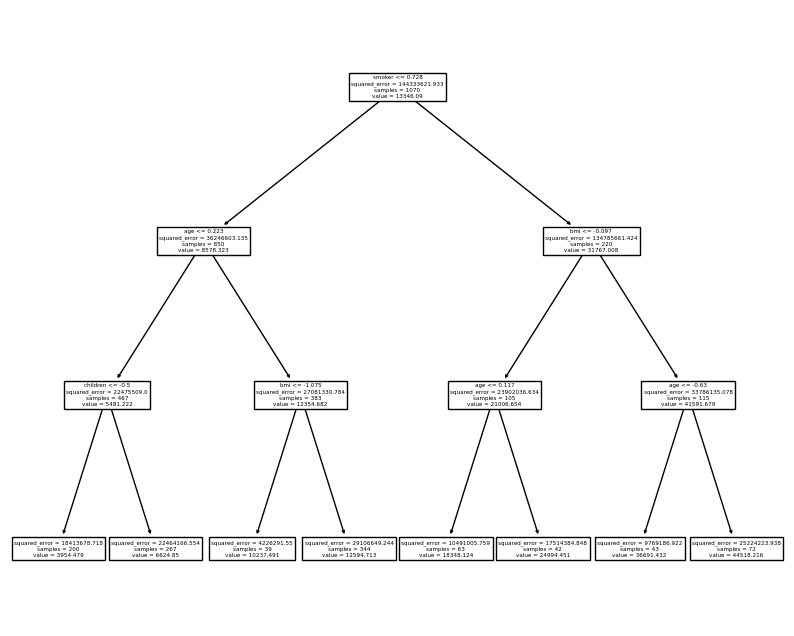

In [92]:
feature_names = X.columns
plt.figure(figsize = (10, 8))
plot_tree(model_tree, feature_names = feature_names)

ważność parametrów

In [93]:
model_tree.score(test_x,test_y)
result = pd.DataFrame({'Feature': X.columns, 'Importance': model_tree.feature_importances_})
result.sort_values('Importance', ascending=False)

,Feature,Importance
4,smoker,0.717658
2,bmi,0.179099
0,age,0.097015
3,children,0.006227
1,sex,0.000000
5,region_northeast,0.000000
6,region_northwest,0.000000
7,region_southeast,0.000000
8,region_southwest,0.000000


## Random Forest

utworzenie random forest 

In [94]:
# Tworzymy model RandomForestClassifier
rf = RandomForestRegressor()

# Trenujemy model na danych treningowych
rf.fit(train_x,train_y)

# Dokonujemy predykcji dla danych testowych.
y_pred = rf.predict(test_x)


# Obliczamy dokładność dla danych testowych
score_forest = r2_score(test_y,y_pred)
print('Score :',score_forest)

Score : 0.8637151025011776


Optymalizacja parametrów - RandomizedSearchCV

In [95]:
param_grid = {"max_depth": [5,6,7,8,9],
              "max_features": list(range(4,9)),
              "n_estimators":[75, 85, 100, 125],
              "min_samples_leaf":[2,3,4,5]}


rf = RandomForestRegressor()
random_search = RandomizedSearchCV(rf,
                                   param_distributions=param_grid,
                                   random_state=42)



random_search.fit(train_x, train_y)

print('Best params set:', random_search.best_params_)
print('Best params score:', random_search.best_score_ )

Best params set: {'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 6, 'max_depth': 6}
Best params score: 0.8492759706702516


In [96]:
# Tworzymy model RandomForestClassifier
rf = RandomForestRegressor(n_estimators= 85, min_samples_leaf=2, max_features= 6, max_depth= 5, bootstrap=True, random_state=42)

# Trenujemy model na danych treningowych
rf.fit(train_x,train_y)

# Dokonujemy predykcji dla danych testowych.
y_pred = rf.predict(test_x)

# Dokonujemy predykcji dla danych treningowych.
y_pred_train = model_tree.predict(train_x)

# Obliczamy dokładność dla danych testowych
score_forest = r2_score(test_y,y_pred)
print('Score:',score_forest)


Score: 0.8782103659550233


In [97]:
Report(test_x,train_x,test_y, train_y, y_pred, y_pred_train)

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,8.480000e-01,8.780000e-01
1,Błąd średniokwadratowy MSE,2.195415e+07,1.890769e+07
2,Pierwiastek błędu średniowkadratowego RMSE,4.685525e+03,4.348297e+03
3,Średni bezwzględny błąd procentowy MAPE,3.890000e-01,3.470000e-01
4,Średni błąd absolutny MAE,2.954220e+03,2.498668e+03


In [98]:
# ważność cech  
rf.score(test_x,test_y)
result = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
result.sort_values('Importance', ascending=False)


,Feature,Importance
4,smoker,0.711708
2,bmi,0.157202
0,age,0.113597
3,children,0.008883
7,region_southeast,0.002807
5,region_northeast,0.002045
1,sex,0.001710
6,region_northwest,0.001070
8,region_southwest,0.000978


## xgBoost

Tworzenie xgBoost

In [99]:
# Tworzymy model xgBoost
model_xgb = xgb.XGBRegressor()

# Trenujemy model na danych treningowych
model_xgb.fit(train_x, train_y)

# Dokonujemy predykcji dla danych testowych.
y_pred = model_xgb.predict(test_x)

# Obliczamy dokładność dla danych testowych
score = r2_score(test_y,y_pred)
print('Accuracy :',score)

Accuracy : 0.8511130579716937


Optymalizacja parametrów - RandomizedSearchCV

In [100]:
param_grid = {"max_depth": [5,6,7,8,9],
              "n_estimators":[45,50,55,60, 75, 85, 80,88],
              "max_leaves":[2,3,4,5,6],
              "min_child_weight":[18,20,22,25]}


random_search = RandomizedSearchCV(model_xgb,
                                   param_distributions=param_grid,
                                   random_state=42)



random_search.fit(train_x, train_y)

print('Best params set:', random_search.best_params_)
print('Best params score:', random_search.best_score_ )

Best params set: {'n_estimators': 55, 'min_child_weight': 18, 'max_leaves': 4, 'max_depth': 5}
Best params score: 0.8453875984715868


In [101]:

model_xgb = xgb.XGBRegressor(n_estimators= 55, min_child_weight= 18, max_leaves= 4, max_depth= 5 )
model_xgb.fit(train_x, train_y)

# Obliczamy dokładność dla danych testowych
score_xg = r2_score(test_y,y_pred)
print('Score :',score_xg)


Score : 0.8511130579716937


In [102]:
Report(test_x,train_x,test_y, train_y, y_pred, y_pred_train)

c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Agata\anaconda3\envs\new_virtual_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in versio

,Miara_dopasowania,Zbior_treningowy,Zbior_testowy
0,Współczynnik determinacji R2,8.480000e-01,8.510000e-01
1,Błąd średniokwadratowy MSE,2.195415e+07,2.311451e+07
2,Pierwiastek błędu średniowkadratowego RMSE,4.685525e+03,4.807755e+03
3,Średni bezwzględny błąd procentowy MAPE,3.890000e-01,3.310000e-01
4,Średni błąd absolutny MAE,2.954220e+03,2.636744e+03


Wykres ważności cech
 - `weight` - liczba wystąpień danej cechy w drzewie
 - `gain` - średnia wartość *gain* dla danej cechy
 - `cover` - uśredniona liczba próbek w których, w których dana cecha jest wykorzystywana do podziału liścia

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

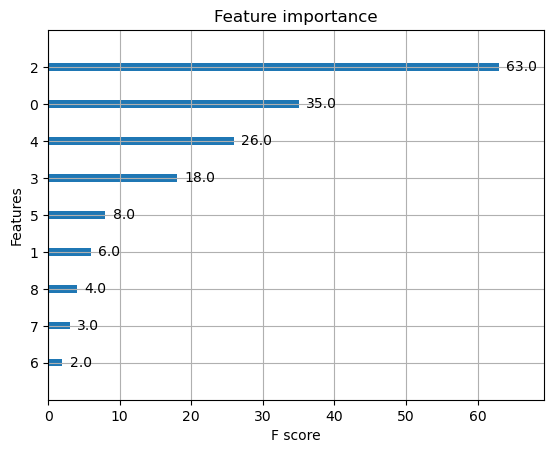

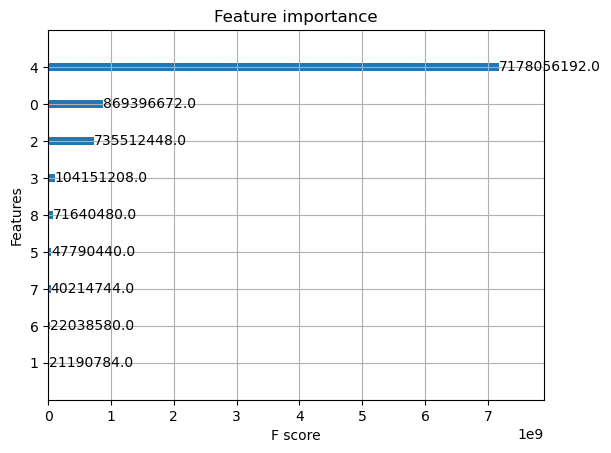

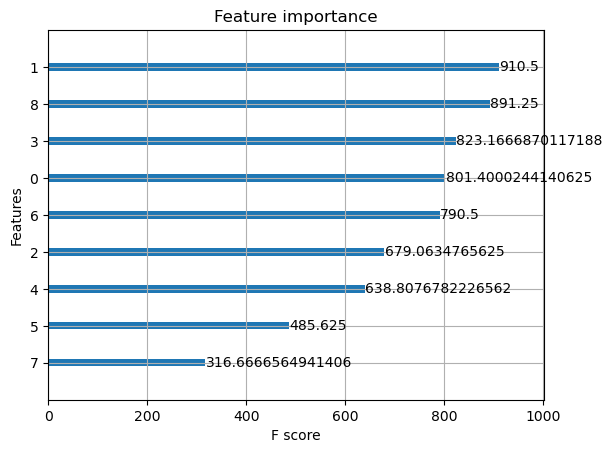

In [103]:
xgb.plot_importance(model_xgb,importance_type="weight",show_values=True)
xgb.plot_importance(model_xgb,importance_type="gain")
xgb.plot_importance(model_xgb,importance_type="cover")


In [104]:
#podsumowanie:
podumowanie = pd.DataFrame({'model':['Regresja liniowa', 'Decision Tree', 'Random Forest', 'xgBoost'],
                           'score': [R2_regresja, score_tree, score_forest, score_xg]})

podumowanie.sort_values('score', ascending=False)


,model,score
2,Random Forest,0.878210
3,xgBoost,0.851113
1,Decision Tree,0.841890
0,Regresja liniowa,0.784000
